In [1]:
!pip install transformers
!pip install torch
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [9]:
def visualize_attention(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt')
    input_ids = inputs['input_ids']

    with torch.no_grad():
        outputs = model(input_ids)
        attentions = outputs.attentions

    avg_attention = torch.mean(torch.stack([attn for attn in attentions]), dim=0)
    avg_attention = torch.mean(avg_attention, dim=1)

    avg_attention = avg_attention.squeeze().numpy()

    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    plt.figure(figsize=(10, 8))
    sns.heatmap(avg_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    plt.title('Attention Heatmap')
    plt.show()

Attention for Medical Note 1:


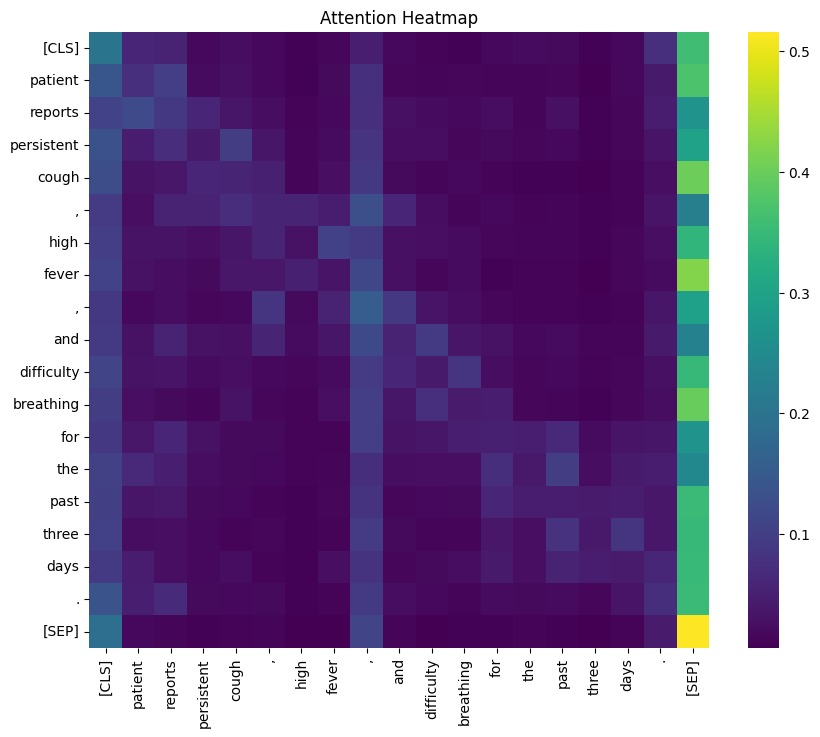

In [10]:
text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
print("Attention for Medical Note 1:")
visualize_attention(text1, model, tokenizer)

Attention for Modified Medical Note 2:


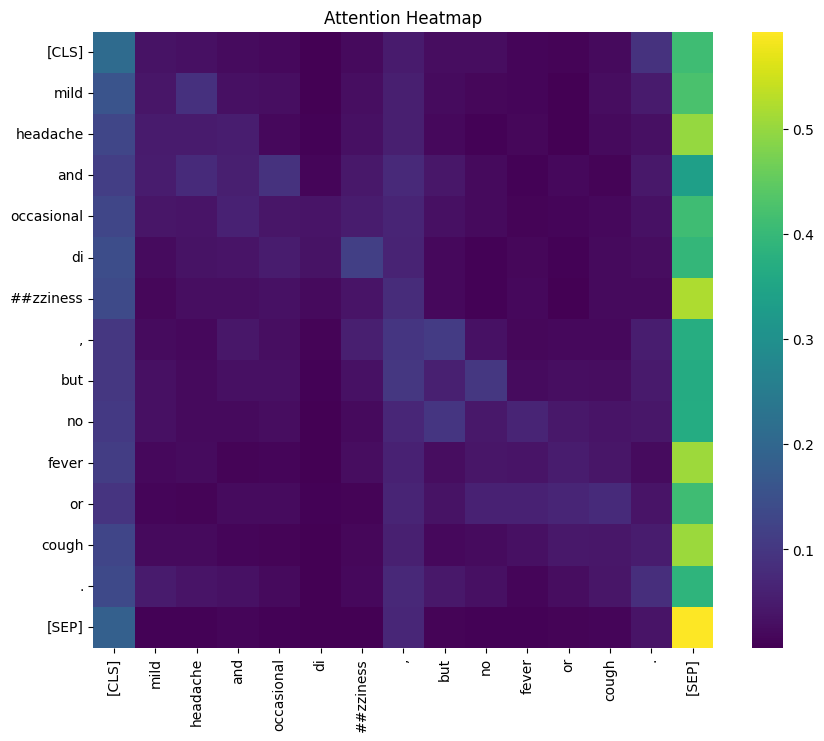

In [12]:
text2 = "Mild headache and occasional dizziness, but no fever or cough."
print("Attention for Modified Medical Note 2:")
visualize_attention(text2, model, tokenizer)

Attention for Medical Note with Rare Symptom:


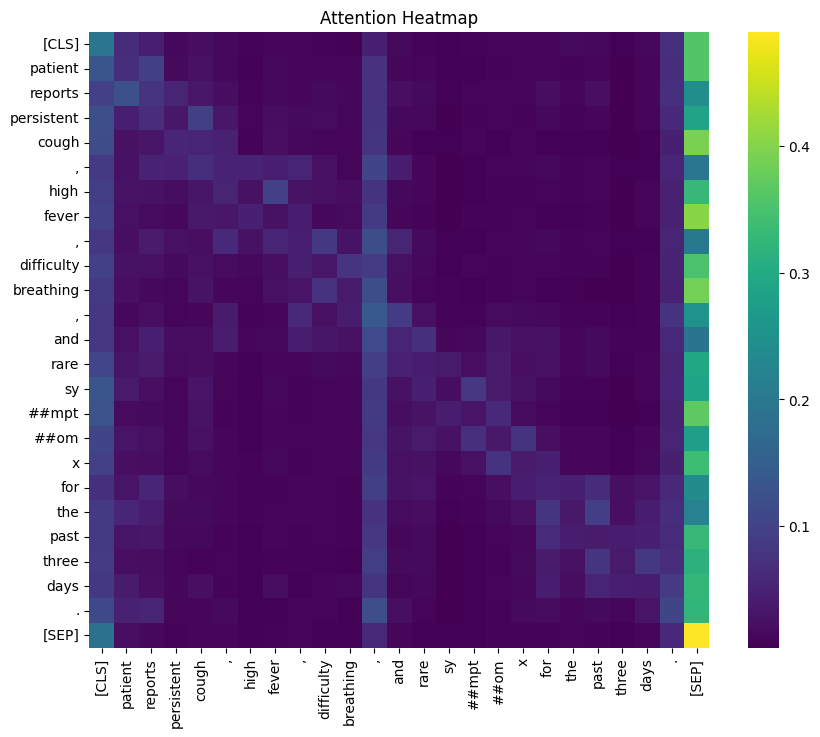

In [13]:
text3 = "Patient reports persistent cough, high fever, difficulty breathing, and rare symptom X for the past three days."
print("Attention for Medical Note with Rare Symptom:")
visualize_attention(text3, model, tokenizer)